<a href="https://colab.research.google.com/github/Blackcipher101/ASL-detector/blob/main/ASLdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [69]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [70]:
import json
token = {"username":"nehalnevle","key":"f56fbefc794d7437f2952910cd1d058d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [71]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [72]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [73]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           1493  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20            910  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            104  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43           1282  
christianlillelund/don

In [74]:
!kaggle datasets download -d datamunge/sign-language-mnist

 66% 41.0M/62.6M [00:02<00:03, 7.42MB/s]
100% 62.6M/62.6M [00:02<00:00, 31.0MB/s]


In [75]:
!unzip '/content/datasets/datamunge/sign-language-mnist/*.zip' 

Archive:  /content/datasets/datamunge/sign-language-mnist/sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy
  inflating: amer_sign3.png          
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: american_sign_language.PNG  
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     
replace sign_mnist_test/sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test/sign_mnist_test.csv  
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    
replace sign_mnist_train/sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [76]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
train = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [78]:
labels = train['label'].values

In [79]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [80]:
train.drop('label', axis = 1, inplace = True)

In [81]:
IMAGE_RES = 224

In [94]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

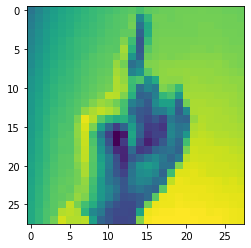

In [95]:
plt.imshow(images[0].reshape(28,28))

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [98]:
x_train = x_train / 255
x_test = x_test / 255

In [99]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [100]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [152]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24,activation = 'softmax')
])

In [102]:
batch_size = 128
num_classes = 24
epochs = 50

In [103]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 64)         

In [105]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 1s 8ms/step - loss: 2.1498 - accuracy: 0.3506 - val_loss: 0.7477 - val_accuracy: 0.7567
Epoch 2/50
151/151 [==============================] - 1s 6ms/step - loss: 0.4849 - accuracy: 0.8408 - val_loss: 0.1816 - val_accuracy: 0.9590
Epoch 3/50
151/151 [==============================] - 1s 6ms/step - loss: 0.1998 - accuracy: 0.9367 - val_loss: 0.0924 - val_accuracy: 0.9752
Epoch 4/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0995 - accuracy: 0.9714 - val_loss: 0.0315 - val_accuracy: 0.9981
Epoch 5/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0602 - accuracy: 0.9841 - val_loss: 0.0105 - val_accuracy: 0.9988
Epoch 6/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.0089 - val_accuracy: 0.9995
Epoch 7/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0256 - accuracy: 0.9940 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 

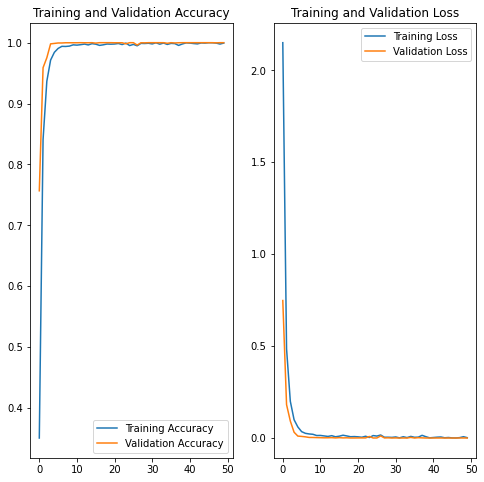

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
test_labels = test['label']

In [108]:
test.drop('label', axis = 1, inplace = True)

In [109]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [110]:
test_labels = label_binrizer.fit_transform(test_labels)

In [111]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [112]:
y_pred = model.predict(test_images)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(test_labels, y_pred.round())

0.9235917456776352

In [115]:
import cv2

In [118]:
from google.colab.patches import cv2_imshow

In [322]:
!curl -o logo.png https://burst.shopifycdn.com/photos/the-letter-a-displayed-in-american-sign-language.jpg?width=4460&height=4460&exif=1&iptc=1&attachment=the-letter-a-displayed-in-american-sign-language.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  403k  100  403k    0     0   197k      0  0:00:02  0:00:02 --:--:--  197k


(28, 28)
(1, 28, 28)
(1, 28, 28, 1)
[[3.9492362e-10 1.6131402e-05 3.2541773e-01 4.6659488e-06 5.6828793e-13
  6.3687495e-09 1.0240949e-03 1.4523340e-03 6.1110154e-07 2.5721230e-09
  1.6406263e-07 6.7915701e-10 1.2823224e-10 2.5775657e-08 1.1889080e-06
  9.4860066e-09 1.2620299e-02 6.4594644e-01 1.4802860e-06 9.4493043e-07
  1.4711722e-13 2.5472556e-07 1.3513689e-02 4.4617410e-10]]
[17]


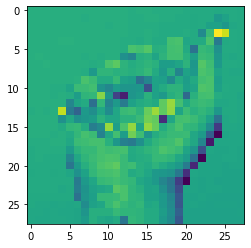

In [370]:
import numpy as np
img = cv2.imread('logo.png',0)

y=800
x=1900
h=1000
w=900
crop_img = img1[y:y+h, x:x+w]
im=cv2.resize(crop_img,(28,28))
#im.reshape((28,28))

print(im.shape) # (28,28)


plt.imshow(im)
batch = np.expand_dims(im,axis=0)
print(batch.shape) # (1, 28, 28)
batch = np.expand_dims(batch,axis=3)
print(batch.shape) # (1, 28, 28,1)




test=model.predict(batch)
print(test)
predicted_ids = np.argmax(test, axis=-1)
print(predicted_ids)